In [ ]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
import tensorflow.keras as keras

In [2]:
from keras.applications.mobilenet import MobileNet

In [3]:
# Loading the Dataset and getting size of it
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("Size of the train images:", x_train.shape)
print("Size of the test images:", x_test.shape)

Size of the train images: (50000, 32, 32, 3)
Size of the test images: (10000, 32, 32, 3)


In [4]:
def preprocess_data(X, Y):
        """ This method has the preprocess to train a model """
        X = X.astype('float32')
        X_p = keras.applications.mobilenet.preprocess_input(X)
        Y_p = keras.utils.to_categorical(Y, 10)
        return(X_p, Y_p)


In [5]:
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

In [10]:
if __name__ == "__main__":

    base_model = keras.applications.mobilenet.MobileNet(weights='imagenet',include_top=False)

    image_size = (224, 224)

    model= keras.Sequential()
    keras.layers.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=x_train.shape[1:]),
    model.add(base_model)
    model.add(keras.layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(1024,activation=('relu')))
    model.add(keras.layers.Dense(512,activation=('relu')))
    model.add(keras.layers.Dense(256,activation=('relu')))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(128,activation=('relu')))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10,activation=('softmax')))


    callback = []

    def decay(epoch):
        """ This method create the alpha"""
        # return 0.001 / (1 + 1 * 30)
        return 0.0001

    callback += [keras.callbacks.LearningRateScheduler(decay, verbose=1)]
    callback += [keras.callbacks.ModelCheckpoint('mobilenet_cifar10.h5',
                                             save_best_only=True,
                                             mode='min'
                                             )]

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x=x_train, y=y_train,
               batch_size=64,
               validation_data=(x_test, y_test),
               epochs=10, shuffle=True,
               callbacks=callback,
               verbose=1
               )

17225924/17225924 [==============================] - 1s 0us/step

Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 1.9255 - accuracy: 0.3085

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 42s 29ms/step - loss: 1.9255 - accuracy: 0.3085 - val_loss: 1.1825 - val_accuracy: 0.5903 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2/10
782/782 [==============================] - 20s 25ms/step - loss: 1.2191 - accuracy: 0.6015 - val_loss: 0.9205 - val_accuracy: 0.6954 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 0.9743 - accuracy: 0.6896 - val_loss: 0.8109 - val_accuracy: 0.7313 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
782/782 [==============================] - 20s 26ms/step - loss: 0.8366 - accuracy: 0.7376 - val_loss: 0.7299 - val_accuracy: 0.7600 - lr: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
782/782 [==============================] - 21s 26ms/step - loss: 0.7224 - accuracy: 0.7707 - val

In [6]:
from keras.models import load_model

model = load_model('mobilenet_cifar10.h5')

2024-03-21 19:39:08.206234: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-21 19:39:08.206257: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-21 19:39:08.206265: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-21 19:39:08.206305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-21 19:39:08.206323: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.summary(show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  Y          
 nal)                                                                       
                                                                            
 global_average_pooling2d (G  (None, 1024)             0         Y          
 lobalAveragePooling2D)                                                     
                                                                            
 dense (Dense)               (None, 1024)              1049600   Y          
                                                                            
 dense_1 (Dense)             (None, 512)               524800    Y          
                                                                            
 dense_2 (Dense)             (None, 256)               1

In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Calculating metrics
print("Confusion Matrix:")
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(np.argmax(y_test, axis=1), predicted_labels))


2024-03-21 19:39:19.752688: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-21 19:39:19.897173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 12ms/step
Confusion Matrix:
[[767  31  51   4  19   3  15  16  60  34]
 [  9 939   3   1   1   1   2   1  12  31]
 [ 27   3 686  29  91  25  93  21  16   9]
 [  5  23  67 406  53 208 160  44  16  18]
 [  5   7  65  13 774  18  54  50  11   3]
 [  6   5  30  85  44 704  60  59   4   3]
 [  2  11  25   6  20  10 919   2   4   1]
 [  5   5  22  11  43  41  10 848   3  12]
 [ 30  29   9   7   6   1   2   4 897  15]
 [ 13 114   2   3   5   1   5   7  22 828]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.80      0.94      0.87      1000
           2       0.71      0.69      0.70      1000
           3       0.72      0.41      0.52      1000
           4       0.73      0.77      0.75      1000
           5       0.70      0.70      0.70      1000
           6       0.70      0.92      0.79      1000
           7       0.81      0.85     

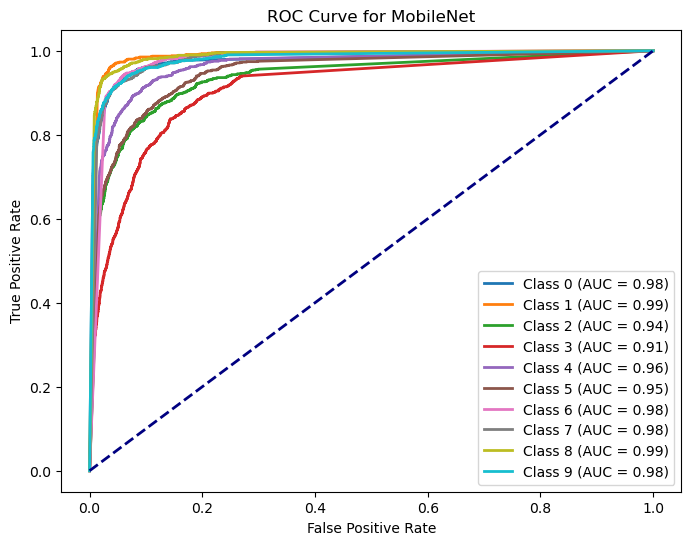

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc = {}

for i in range(10): 
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(10):  
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MobileNet')
plt.legend(loc='lower right')
plt.show()


In [12]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.9639498555555555
